In [1]:
# Homework 6 
# Prepared by G. Besla & R. Li
# Finished by F. Fauzi

In [29]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from centerofmass2 import CenterOfMass

In [3]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy, the name of the galaxy
        start, the number of the first snapshot to be read in
        end, the number of the last snapshot to be read in
        n, an integer indicating the intervals over which you will return the COM
    returns: 
        the time and COM position and velocity vectors
        
    save output into a file
    """
    
    # compose the filename for output
    fileout = "Orbit_galaxyname.txt"
    fileout1 = "Orbit_MW.txt"
    fileout2 = "Orbit_M31.txt"
    fileout3 = "Orbit_M33.txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    VolDec = 4
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end,n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id)
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP = COM.COM_P(delta, VolDec)
        COMV = COM.COM_V(COMP[0],COMP[1],COMP[2])
        
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        time, total, data = Read(filename)
        orbit[i][0] = time.value
        orbit[i][1] = COMP[0].value
        orbit[i][2] = COMP[1].value
        orbit[i][3] = COMP[2].value
        orbit[i][4] = COMV[0].value
        orbit[i][5] = COMV[1].value
        orbit[i][6] = COMV[2].value
        
        # print snap_id to see the progress
        # print(i,snap_id)
        
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    #print (orbit)
    return orbit
    

In [4]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first!
fileout1 = "Orbit_MW.txt"
fileout2 = "Orbit_M31.txt"
fileout3 = "Orbit_M33.txt"

MWOrbit = OrbitCOM("MW",0,801,5)
np.savetxt(fileout1, MWOrbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

M31Orbit = OrbitCOM("M31",0,801,5)
np.savetxt(fileout2, M31Orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

M33Orbit = OrbitCOM("M33",0,801,5)
np.savetxt(fileout3, M33Orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [5]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
data_MWOrbit = np.genfromtxt(fileout1,dtype=None,names=True)
data_M31Orbit = np.genfromtxt(fileout2,dtype=None,names=True)
data_M33Orbit = np.genfromtxt(fileout3,dtype=None,names=True)#store remainding data


In [6]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
MW_x = data_MWOrbit['x']
MW_y = data_MWOrbit['y']
MW_z = data_MWOrbit['z']
MW_vx = data_MWOrbit['vx']
MW_vy = data_MWOrbit['vy']
MW_vz = data_MWOrbit['vz']
    
M31_x = data_M31Orbit['x']
M31_y = data_M31Orbit['y']
M31_z = data_M31Orbit['z']
M31_vx = data_M31Orbit['vx']
M31_vy = data_M31Orbit['vy']
M31_vz = data_M31Orbit['vz']
    
M33_x = data_M33Orbit['x']
M33_y = data_M33Orbit['y']
M33_z = data_M33Orbit['z']
M33_vx = data_M33Orbit['vx']
M33_vy = data_M33Orbit['vy']
M33_vz = data_M33Orbit['vz']

print (len(MW_z),len(M31_z),len(M33_z))
    
def mag():
    
    mag_sep1 = np.zeros(np.size(MW_x))
    mag_vel1 = np.zeros(np.size(MW_x))
    mag_sep2 = np.zeros(np.size(MW_x))
    mag_vel2 = np.zeros(np.size(MW_x))
    
    for i in range(0,len(MW_x)):
        sep1 = [MW_x[i]-M31_x[i], MW_y[i]-M31_y[i], MW_z[i]-M31_z[i]]
        sep1_mag = np.sqrt(sep1[0]**2+sep1[1]**2+sep1[2]**2)
        mag_sep1[i] = sep1_mag 
        
        vel1 = [MW_vx[i]-M31_vx[i], MW_vy[i]-M31_vy[i], MW_vz[i]-M31_vz[i]]
        vel1_mag = np.sqrt(vel1[0]**2+vel1[1]**2+vel1[2]**2)
        mag_vel1[i] = vel1_mag
        
        sep2 = [M31_x[i]-M33_x[i], M31_y[i]-M33_y[i], M31_z[i]-M33_z[i]]
        sep2_mag = np.sqrt(sep2[0]**2+sep2[1]**2+sep2[2]**2)
        mag_sep2[i] = sep2_mag
        
        vel2 = [M31_vx[i]-M33_vx[i], M31_vy[i]-M33_vy[i], M31_vz[i]-M33_vz[i]]
        vel2_mag = np.sqrt(vel2[0]**2+vel2[1]**2+vel2[2]**2)
        mag_vel2[i] = vel2_mag
    
    return mag_sep1, mag_vel1, mag_sep2, mag_vel2
        

161 161 161


In [7]:
# Determine the magnitude of the relative position and velocities 
mag_sep1, mag_vel1, mag_sep2, mag_vel2 = mag()

# of MW and M31
print("magnitude of relative separation of MW and M31:",mag_sep1*u.kpc)
print("magnitude of velocities of MW and M31:",mag_vel1*u.km/u.s)
# of M33 and M31
print("\nmagnitude of relative separation of M31 and M33:",mag_sep2*u.kpc)
print("magnitude of velocities of M31 and M33:",mag_vel2*u.km/u.s)


magnitude of relative separation of MW and M31: [7.69148550e+02 7.61104935e+02 7.52805625e+02 7.43233109e+02
 7.35560959e+02 7.26727957e+02 7.17639083e+02 7.09016085e+02
 6.99566723e+02 6.90812953e+02 6.82596320e+02 6.74231969e+02
 6.65911481e+02 6.57710340e+02 6.49894133e+02 6.41810233e+02
 6.33995718e+02 6.26261254e+02 6.17721516e+02 6.09451389e+02
 6.00962739e+02 5.92245102e+02 5.83184574e+02 5.73611758e+02
 5.63718334e+02 5.53323491e+02 5.42979978e+02 5.32018353e+02
 5.20648786e+02 5.08815232e+02 4.96384129e+02 4.83688294e+02
 4.70940300e+02 4.57681557e+02 4.44013485e+02 4.30377567e+02
 4.15919941e+02 4.01228115e+02 3.86353117e+02 3.71151948e+02
 3.55566613e+02 3.39362337e+02 3.22755604e+02 3.05881266e+02
 2.87704317e+02 2.69204827e+02 2.50290649e+02 2.31142601e+02
 2.09596822e+02 1.87868449e+02 1.64744330e+02 1.40650334e+02
 1.14953230e+02 8.78422956e+01 6.05659847e+01 3.82728559e+01
 4.01440108e+01 6.20227813e+01 8.58657475e+01 1.06535985e+02
 1.23989584e+02 1.37677398e+02 1.4882

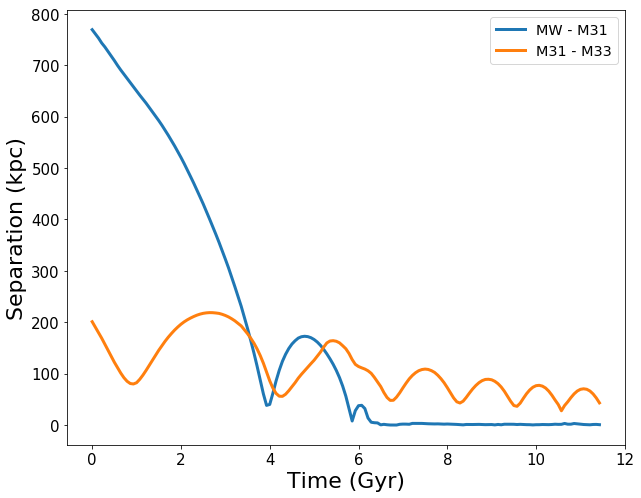

In [32]:
# Plot the Orbit of the galaxies 
#################################

MW_t = data_MWOrbit['t']*1e-3*u.Gyr

y1 = mag_sep1*u.kpc
y2 = mag_sep2*u.kpc

#axis defined
fig,ax = plt.subplots(figsize=(10,8))


#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 
plt.plot(MW_t, y1, linewidth = 3, label='MW - M31')
plt.plot(MW_t, y2, linewidth = 3, label='M31 - M33')

# Axes labels 
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Separation (kpc)', fontsize=22)

# Legend
plt.legend(loc='best',fontsize='x-large')


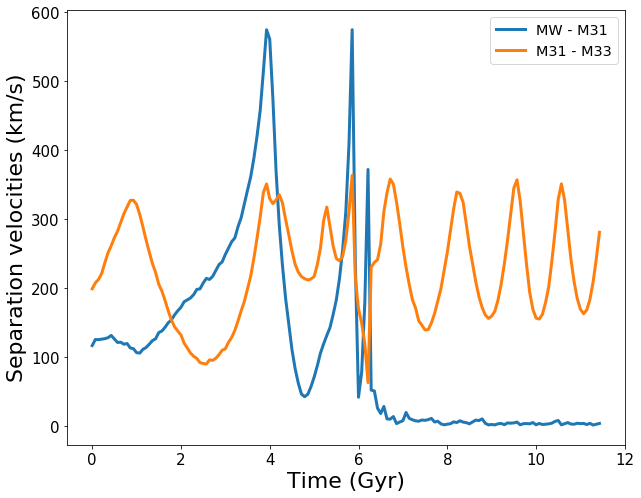

In [24]:
# Plot the orbital velocities of the galaxies 
#################################
#axis defined
fig,ax = plt.subplots(figsize=(10,8))


#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot
plt.plot(MW_t, mag_vel1, linewidth = 3, label='MW - M31')
plt.plot(MW_t, mag_vel2, linewidth = 3, label='M31 - M33')

# Axes labels 
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Separation velocities (km/s)', fontsize=22)

# Legend
plt.legend(loc='best',fontsize='x-large')